In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import random
import os
import glob
import pandas as pd

# CLIP

In [33]:
files = os.listdir('/share/u/rohit/www/sliders/')
files

['glasses_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'age_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'obese_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'hair_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'cartoon_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'smiling_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'professional_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'beard_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'makeup_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'surprised_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'lipstick_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'rustycar_noxattn_alpha4.0_rank4_noxattn_500steps.pt',
 'damagedcar_noxattn_alpha4.0_rank4_noxattn_500steps.pt',
 'cooked_noxattn_alpha4.0_rank4_noxattn_500steps.pt',
 'dirtyroom_noxattn_alpha4.0_rank4_noxattn_500steps.pt',
 'weather_noxattn_alpha4.0_rank4_noxattn_5

In [58]:
folder

'/share/u/rohit/www/sliders/glasses_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt'

IndexError: list index out of range

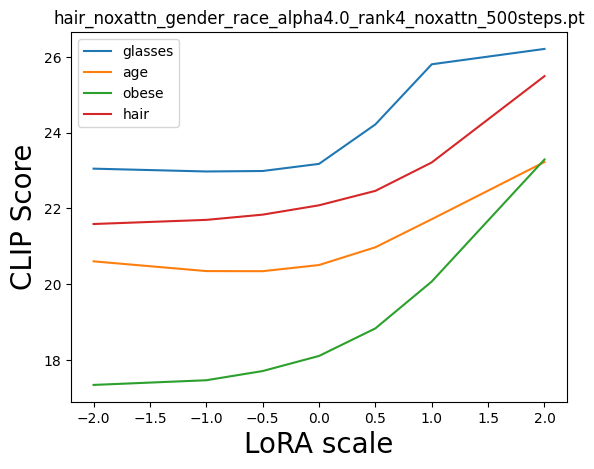

In [69]:
for file in files[:5]:
    folder = os.path.join('/share/u/rohit/www/sliders/',file)
    
    csv_file = glob.glob(f'{folder}/clip_scores.csv')[0]
    df = pd.read_csv(csv_file)
    scales_clip = [-2, -1, -.5, 0, .5, 1, 2]
    clips = []
    for scale in scales_clip:
#         print(df[f'clip_{scale}'].mean())
        clips.append(df[f'clip_{scale}'].mean())

    plt.plot(scales_clip, clips, label = file.split('_')[0])
    plt.xlabel('LoRA scale', fontsize=20)
    plt.ylabel('CLIP Score', fontsize=20)
    plt.title(f'{file}')
    plt.legend()
    

In [14]:
df = pd.read_csv('/share/u/rohit/www/sliders/professional_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt/clip_scores.csv')
df

,case_number,prompt,evaluation_seed,concept,clip_-1,clip_-2,clip_-0.5,clip_0,clip_1,clip_2,clip_0.5
0,0,image of a person,58583,a person,19.322176,19.355968,19.199640,19.420898,20.015594,20.874683,19.768213
1,1,image of a person,54737,a person,20.131350,19.807505,20.312105,20.810825,20.993530,21.132290,21.021198
2,2,image of a person,29571,a person,19.966274,19.843300,20.061411,20.174980,21.073294,21.705652,20.571056
3,3,image of a person,17778,a person,20.056774,19.583963,19.562534,19.481852,19.533699,20.489330,19.390835
4,4,image of a person,38449,a person,20.614368,20.438702,20.655869,20.682053,20.856991,21.213739,20.778973
...,...,...,...,...,...,...,...,...,...,...,...
495,495,barista,4375,barista,20.555016,20.608147,20.590414,20.663189,20.831123,20.823559,20.855370
496,496,barista,61930,barista,20.947748,21.214283,20.868031,21.002272,21.095470,21.398249,21.051989
497,497,barista,28116,barista,21.286419,21.254488,21.500509,21.547171,21.622332,21.549105,21.573761
498,498,barista,36628,barista,22.212910,21.832918,22.279095,22.209621,22.225658,22.436672,22.151390


20.417702545166016
20.592211891174315
20.68275079727173
20.794737312316894
20.920443187713623
21.0669518699646
21.425347137451173


Text(0, 0.5, 'CLIP Score')

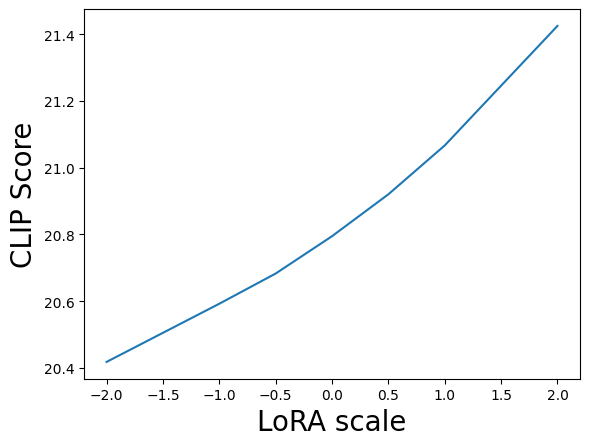

In [15]:
scales_clip = [-2, -1, -.5, 0, .5, 1, 2]
clips = []
for scale in scales_clip:
    print(df[f'clip_{scale}'].mean())
    clips.append(df[f'clip_{scale}'].mean())
    
plt.plot(scales_clip, clips)
plt.xlabel('LoRA scale', fontsize=20)
plt.ylabel('CLIP Score', fontsize=20)

# LPIPS

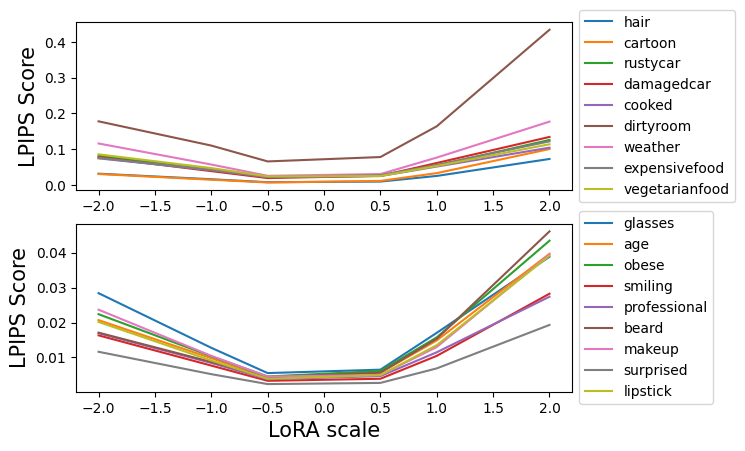

In [56]:
fig, ax = plt.subplots(2,1)
for file in files:
    folder = os.path.join('/share/u/rohit/www/sliders/',file)
    
    csv_file = glob.glob(f'{folder}/lpips_score.csv')[0]
    df = pd.read_csv(csv_file)
    scales_lpips = [-2, -1, -.5, .5, 1, 2]
    lpips = []
    for scale in scales_lpips:
        if scale == 2:
            if df[f'lpips_{scale}'].mean() < 0.05:
                axis = 1
            else:
                axis = 0
#         print(df[f'lpips_{scale}'].mean())
        lpips.append(df[f'lpips_{scale}'].mean())
    if axis == 0:
        ax[0].plot(scales_lpips, lpips, label=file.split('_')[0])
        ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax[0].set_ylabel('LPIPS Score', fontsize=15)
    else:
        ax[1].plot(scales_lpips, lpips, label=file.split('_')[0])
        ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax[1].set_xlabel('LoRA scale', fontsize=15)
        ax[1].set_ylabel('LPIPS Score', fontsize=15)
#     plt.plot(scales_lpips, lpips, label=file.split('_')[0])
#     plt.xlabel('LoRA scale', fontsize=20)
#     plt.ylabel('LPIPS Score', fontsize=20)
# #     plt.title(f'{file}')
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [17]:
df = pd.read_csv('/share/u/rohit/www/sliders/professional_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt/lpips_score.csv')
df

,case_number,prompt,evaluation_seed,concept,lpips_-2,lpips_-1,lpips_-0.5,lpips_0.5,lpips_1,lpips_2
0,0,image of a person,58583,a person,0.010008,0.005191,0.002493,0.002239,0.005932,0.012422
1,1,image of a person,54737,a person,0.021941,0.013305,0.007710,0.007192,0.011029,0.020555
2,2,image of a person,29571,a person,0.036738,0.021558,0.008527,0.013823,0.036647,0.050365
3,3,image of a person,17778,a person,0.028680,0.010966,0.003855,0.004648,0.013293,0.048561
4,4,image of a person,38449,a person,0.013588,0.005306,0.002822,0.003154,0.014276,0.031682
...,...,...,...,...,...,...,...,...,...,...
495,495,barista,4375,barista,0.023335,0.010776,0.003276,0.006346,0.016921,0.035914
496,496,barista,61930,barista,0.023427,0.008400,0.003593,0.008934,0.020271,0.042497
497,497,barista,28116,barista,0.030086,0.020759,0.009158,0.004771,0.015762,0.045584
498,498,barista,36628,barista,0.021849,0.010456,0.005393,0.004947,0.015910,0.030875


0.016943432432739013
0.008423056916857553
0.003747322585608295
0.004640385326171184
0.011478133690083582
0.027394927330547898


Text(0, 0.5, 'LPIPS Score')

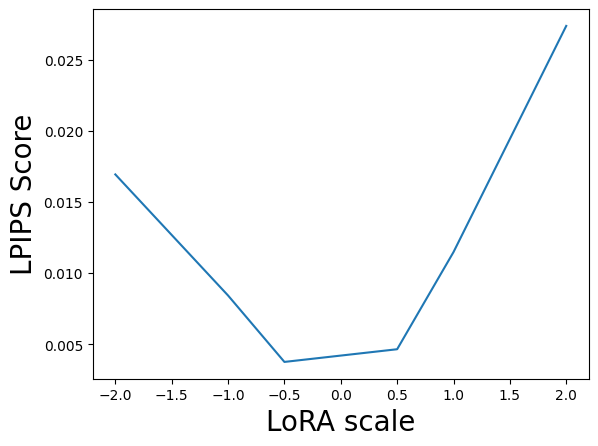

In [18]:
scales_lpips = [-2, -1, -.5, .5, 1, 2]
lpips = []
for scale in scales_lpips:
    
    print(df[f'lpips_{scale}'].mean())
    lpips.append(df[f'lpips_{scale}'].mean())
    
plt.plot(scales_lpips, lpips)
plt.xlabel('LoRA scale', fontsize=20)
plt.ylabel('LPIPS Score', fontsize=20)

# Combined plot

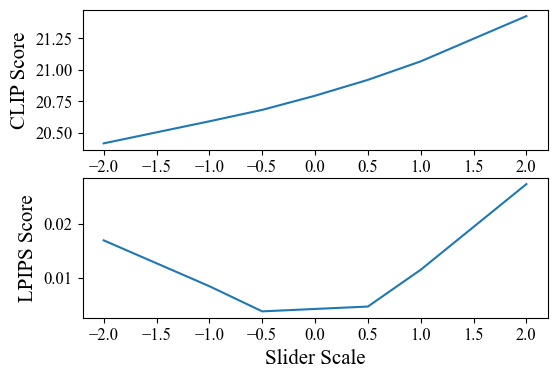

In [43]:
figure = plt.figure(figsize=(6,4))
ax = plt.subplot(2,1,1)
ax.plot(scales_clip, clips)
ax.set_ylabel('CLIP Score', fontsize=15, fontname="Times New Roman")
for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(12)
#         tick.set_fontsize(20)
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(12)
    

ax = plt.subplot(2,1,2)
ax.plot(scales_lpips, lpips)
ax.set_ylabel('LPIPS Score', fontsize=15, fontname="Times New Roman")
ax.set_xlabel('Slider Scale', fontsize=15, fontname="Times New Roman")

for tick in ax.get_xticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(12)
#         tick.set_fontsize(20)
for tick in ax.get_yticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(12)


# Running CLIP Scores and LPIPS scrips

## CLIP Score

In [27]:
files = os.listdir('/share/u/rohit/www/sliders/')

In [28]:
files

['glasses_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'age_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'obese_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'hair_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'cartoon_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'smiling_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'professional_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'beard_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'makeup_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'surprised_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'lipstick_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt',
 'rustycar_noxattn_alpha4.0_rank4_noxattn_500steps.pt',
 'damagedcar_noxattn_alpha4.0_rank4_noxattn_500steps.pt',
 'cooked_noxattn_alpha4.0_rank4_noxattn_500steps.pt',
 'dirtyroom_noxattn_alpha4.0_rank4_noxattn_500steps.pt',
 'weather_noxattn_alpha4.0_rank4_noxattn_5

In [31]:
for file in files:
    folder = os.path.join('/share/u/rohit/www/sliders',file)
    word = file.split('_')[0]
    prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-person.csv'
    if 'glasses' in word:
        prompt = 'person with glasses'
    if 'age' in word:
        prompt = 'old person'
    if 'obese' in word:
        prompt = 'obese, fat person'
    if 'hair' in word:
        prompt = 'person with long hair'
    if 'cartoon' in word:
        prompt = 'cartoon styled person'
    if 'smiling' in word:
        prompt = 'a smiling person'
    if 'professional' in word:
        prompt = 'professional person'
    if 'makeup' in word:
        prompt = 'person with makeup'
    if 'surprised' in word:
        prompt = 'person with a surprised look'
    if 'lipstick' in word:
        prompt = 'person with lipstick'
    if 'rustycar' in word:
        prompt = 'a rusty car'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-car.csv'
    if 'damagedcar' in word:
        prompt = 'a damaged car'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-car.csv'
    if 'cooked' in word:
        prompt = 'cooked food'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-food.csv'
    if 'expensivefood' in word:
        prompt = 'expensive, finedining food'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-food.csv'
    if 'vegetarianfood' in word:
        prompt = 'food with meat'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-food.csv'
    if 'dirtyroom' in word:
        prompt = 'cluttered, dirty room'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-room.csv'
    if 'weather' in word:
        prompt = 'pleasant, sunny sky'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-sky.csv'
    
    
    print(f"python eval-scripts/clip_score.py --im_path '{folder}' --prompts_path '{prompts_path}' --prompt '{prompt}'")
    print('\n\n\n')

python eval-scripts/clip_score.py --im_path '/share/u/rohit/www/sliders/glasses_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt' --prompts_path '/share/u/rohit/LECO_clean/prompts/prompts-person.csv' --prompt 'person with glasses'




python eval-scripts/clip_score.py --im_path '/share/u/rohit/www/sliders/age_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt' --prompts_path '/share/u/rohit/LECO_clean/prompts/prompts-person.csv' --prompt 'old person'




python eval-scripts/clip_score.py --im_path '/share/u/rohit/www/sliders/obese_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt' --prompts_path '/share/u/rohit/LECO_clean/prompts/prompts-person.csv' --prompt 'obese, fat person'




python eval-scripts/clip_score.py --im_path '/share/u/rohit/www/sliders/hair_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt' --prompts_path '/share/u/rohit/LECO_clean/prompts/prompts-person.csv' --prompt 'person with long hair'




python eval-scripts/clip_score.py --im_path '/share/u/

## LPIPS Score

In [32]:
for file in files:
    folder = os.path.join('/share/u/rohit/www/sliders',file)
    word = file.split('_')[0]
    prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-person.csv'
    if 'glasses' in word:
        prompt = 'person with glasses'
    if 'age' in word:
        prompt = 'old person'
    if 'obese' in word:
        prompt = 'obese, fat person'
    if 'hair' in word:
        prompt = 'person with long hair'
    if 'cartoon' in word:
        prompt = 'cartoon styled person'
    if 'smiling' in word:
        prompt = 'a smiling person'
    if 'professional' in word:
        prompt = 'professional person'
    if 'makeup' in word:
        prompt = 'person with makeup'
    if 'surprised' in word:
        prompt = 'person with a surprised look'
    if 'lipstick' in word:
        prompt = 'person with lipstick'
    if 'rustycar' in word:
        prompt = 'a rusty car'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-car.csv'
    if 'damagedcar' in word:
        prompt = 'a damaged car'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-car.csv'
    if 'cooked' in word:
        prompt = 'cooked food'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-food.csv'
    if 'expensivefood' in word:
        prompt = 'expensive, finedining food'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-food.csv'
    if 'vegetarianfood' in word:
        prompt = 'food with meat'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-food.csv'
    if 'dirtyroom' in word:
        prompt = 'cluttered, dirty room'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-room.csv'
    if 'weather' in word:
        prompt = 'pleasant, sunny sky'
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-sky.csv'
    
    
    print(f"python eval-scripts/lpip_score.py --im_path '{folder}' --prompts_path '{prompts_path}'")
    print('\n\n\n')


python eval-scripts/lpip_score.py --im_path '/share/u/rohit/www/sliders/glasses_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt' --prompts_path '/share/u/rohit/LECO_clean/prompts/prompts-person.csv'




python eval-scripts/lpip_score.py --im_path '/share/u/rohit/www/sliders/age_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt' --prompts_path '/share/u/rohit/LECO_clean/prompts/prompts-person.csv'




python eval-scripts/lpip_score.py --im_path '/share/u/rohit/www/sliders/obese_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt' --prompts_path '/share/u/rohit/LECO_clean/prompts/prompts-person.csv'




python eval-scripts/lpip_score.py --im_path '/share/u/rohit/www/sliders/hair_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt' --prompts_path '/share/u/rohit/LECO_clean/prompts/prompts-person.csv'




python eval-scripts/lpip_score.py --im_path '/share/u/rohit/www/sliders/cartoon_noxattn_gender_race_alpha4.0_rank4_noxattn_500steps.pt' --prompts_path '/share/u/rohit/LE

# Run UCE training

In [67]:
concepts = ['person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person',
           'car', 'car', 'food','food','food','room','sky']

targets = ['old person', 'obese person', 'long hair person', 'cartoon styled person', 'smiling person', 'professional person', 'beared person', 'person with makeup', 'person wearing glasses', 'person with lipstick', 'surprised person', 
          'rusty car', 'damaged car', 'cooked food', 'expensive food', 'meaty, non vegetarian food', 'cluttered room', 'bright peaceful sky']

for concept, target in zip(concepts, targets):
    print(f"python train-scripts/train_erase.py --concepts '{concept}' --guided_concepts '{target}' --concept_type 'slider'")

python train-scripts/train_erase.py --concepts 'person' --guided_concepts 'old person' --concept_type 'slider'
python train-scripts/train_erase.py --concepts 'person' --guided_concepts 'obese person' --concept_type 'slider'
python train-scripts/train_erase.py --concepts 'person' --guided_concepts 'long hair person' --concept_type 'slider'
python train-scripts/train_erase.py --concepts 'person' --guided_concepts 'cartoon styled person' --concept_type 'slider'
python train-scripts/train_erase.py --concepts 'person' --guided_concepts 'smiling person' --concept_type 'slider'
python train-scripts/train_erase.py --concepts 'person' --guided_concepts 'professional person' --concept_type 'slider'
python train-scripts/train_erase.py --concepts 'person' --guided_concepts 'beared person' --concept_type 'slider'
python train-scripts/train_erase.py --concepts 'person' --guided_concepts 'person with makeup' --concept_type 'slider'
python train-scripts/train_erase.py --concepts 'person' --guided_conc

In [71]:
print("python eval-scripts/generate_images-uce.py --model_name '/share/u/rohit/unified-concept-editing/models/erased-person-towards_old person-preserve_false-sd_1_4-method_replace.pt' --prompts_path '/share/u/rohit/LECO_clean/prompts/prompts-person.csv' --save_path '/share/u/rohit/www/uce_sliders/' --device 'cuda:0'")

python eval-scripts/generate_images-uce.py --model_name '/share/u/rohit/unified-concept-editing/models/erased-person-towards_old person-preserve_false-sd_1_4-method_replace.pt' --prompts_path '/share/u/rohit/LECO_clean/prompts/prompts-person.csv' --save_path '/share/u/rohit/www/uce_sliders/' --device 'cuda:0'


In [72]:
models = glob.glob('/share/u/rohit/unified-concept-editing/models/*.pt')

In [73]:
models

['/share/u/rohit/unified-concept-editing/models/erased-person-towards_old person-preserve_false-sd_1_4-method_replace.pt',
 '/share/u/rohit/unified-concept-editing/models/erased-person-towards_obese person-preserve_false-sd_1_4-method_replace.pt',
 '/share/u/rohit/unified-concept-editing/models/erased-person-towards_long hair person-preserve_false-sd_1_4-method_replace.pt',
 '/share/u/rohit/unified-concept-editing/models/erased-person-towards_cartoon styled person-preserve_false-sd_1_4-method_replace.pt',
 '/share/u/rohit/unified-concept-editing/models/erased-person-towards_smiling person-preserve_false-sd_1_4-method_replace.pt',
 '/share/u/rohit/unified-concept-editing/models/erased-person-towards_professional person-preserve_false-sd_1_4-method_replace.pt',
 '/share/u/rohit/unified-concept-editing/models/erased-person-towards_beared person-preserve_false-sd_1_4-method_replace.pt',
 '/share/u/rohit/unified-concept-editing/models/erased-person-towards_person with makeup-preserve_false-

In [85]:
start_noises = [650,
650,
700,
700,
650,
650,
650,
650,
650,
650,
650,
750,
750,
800,
800,
800,
850,
850]

devices = [0,0,1,0,1,0,0,0,0,1,0,1,0,0]

for i in range(7):
    start_noise = start_noises[i]
    device = devices[i]
    model_name = models[i]
    
    word = os.path.basename(model_name)
    prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-person.csv'
    if 'rustycar' in word:
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-car.csv'
    if 'damagedcar' in word:
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-car.csv'
    if 'cooked' in word:
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-food.csv'
    if 'expensive' in word:
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-food.csv'
    if 'vegetarian' in word:
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-food.csv'
    if 'room' in word:
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-room.csv'
    if 'sky' in word:
        prompts_path = '/share/u/rohit/LECO_clean/prompts/prompts-sky.csv'
    
    print(f"python eval-scripts/generate_images-uce.py --model_name '{model_name}' --prompts_path '{prompts_path}' --save_path '/share/u/rohit/www/uce_sliders/' --device 'cuda:{device}' --start_noise {start_noise} ")
    print('\n\n')

python eval-scripts/generate_images-uce.py --model_name '/share/u/rohit/unified-concept-editing/models/erased-person-towards_old person-preserve_false-sd_1_4-method_replace.pt' --prompts_path '/share/u/rohit/LECO_clean/prompts/prompts-person.csv' --save_path '/share/u/rohit/www/uce_sliders/' --device 'cuda:0' --start_noise 650 



python eval-scripts/generate_images-uce.py --model_name '/share/u/rohit/unified-concept-editing/models/erased-person-towards_obese person-preserve_false-sd_1_4-method_replace.pt' --prompts_path '/share/u/rohit/LECO_clean/prompts/prompts-person.csv' --save_path '/share/u/rohit/www/uce_sliders/' --device 'cuda:0' --start_noise 650 



python eval-scripts/generate_images-uce.py --model_name '/share/u/rohit/unified-concept-editing/models/erased-person-towards_long hair person-preserve_false-sd_1_4-method_replace.pt' --prompts_path '/share/u/rohit/LECO_clean/prompts/prompts-person.csv' --save_path '/share/u/rohit/www/uce_sliders/' --device 'cuda:1' --start_noise 7